# In this project we will be predicting whether a person makes above $50,000 in income or not using various attributes about the person

### Data Source

The data comes from the UCI Machine Learning Repository
http://mlr.cs.umass.edu/ml/datasets/Adult

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 



### Data Description: 


>50K (=1) , <=50K (=0) . 

* age: continuous. 
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-         worked. 
* fnlwgt: continuous. 
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th,         Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* education-num: continuous. 
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-   AF-spouse. 
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-           cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv,   Armed-Forces. 
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* sex: Female, Male. 
* capital-gain: continuous. 
* capital-loss: continuous. 
* hours-per-week: continuous. 
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc),       India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,   Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala,         Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np


In [2]:
!pip install seaborn

In [3]:
import seaborn as sns

In [4]:
# Import data
adult_data = pd.read_csv("adult_data.csv")
adult_data.head()



,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
adult_data.columns = ["Age", "Workclass", "fnlwgt", "education", "education_num", "marital status", "occupation", "relationship", "race", "sex", "capital gain", "capital loss", "hours-per-week", "native country", "income"]

## Describing and Analyzing the Data

In [6]:
adult_data.head()

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
adult_data.dtypes

Age                int64
Workclass         object
fnlwgt             int64
education         object
education_num      int64
marital status    object
occupation        object
relationship      object
race              object
sex               object
capital gain       int64
capital loss       int64
hours-per-week     int64
native country    object
income            object
dtype: object

In [8]:
adult_data.income.value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

In [9]:
len(adult_data)

32560

In [10]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital gain    32560 non-null  int64 
 11  capital loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
# Are there any misssing values?
adult_data.isna().sum()

Age               0
Workclass         0
fnlwgt            0
education         0
education_num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours-per-week    0
native country    0
income            0
dtype: int64

In [12]:
adult_data.head()

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
pd.crosstab(adult_data.education, adult_data.income)

income,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [14]:
pd.crosstab(adult_data.race, adult_data.income)

income,<=50K,>50K
race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


### Charts

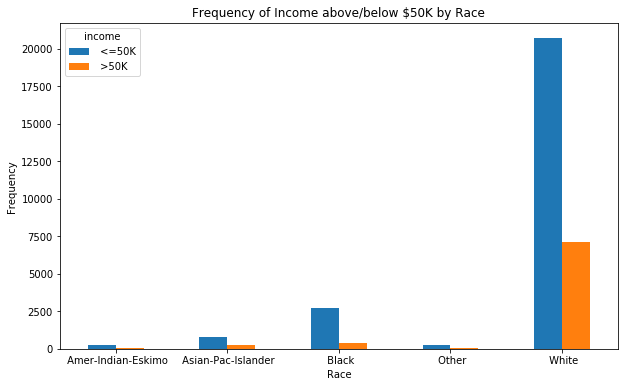

In [15]:
pd.crosstab(adult_data.race, adult_data.income).plot(kind="bar",
                                                     figsize=(10, 6),)
                                

plt.title("Frequency of Income above/below $50K by Race")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.xticks(rotation=0);

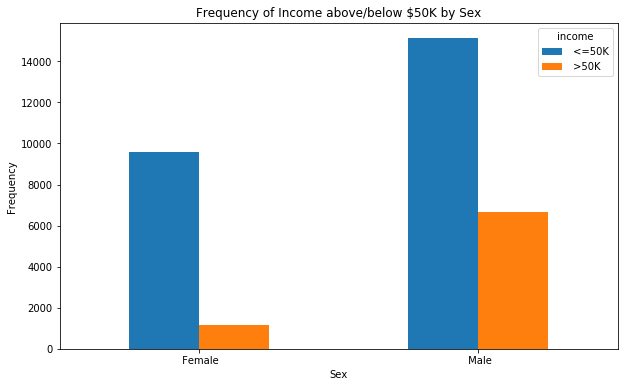

In [16]:
pd.crosstab(adult_data.sex, adult_data.income).plot(kind="bar",
                                                     figsize=(10, 6),)
                                

plt.title("Frequency of Income above/below $50K by Sex")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.xticks(rotation=0);

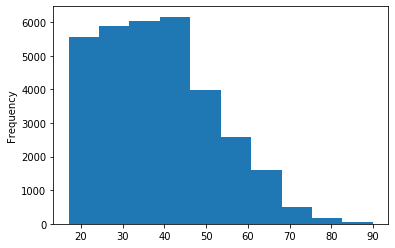

In [17]:
# Check the distribution of the age column with a histogram
adult_data.Age.plot.hist();

### Education Num vs Age

In [18]:
adult_data["income"] = adult_data['income'].str.contains('=').astype(int)

adult_data.head()

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [19]:
adult_data.tail()

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,1
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,1
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,0


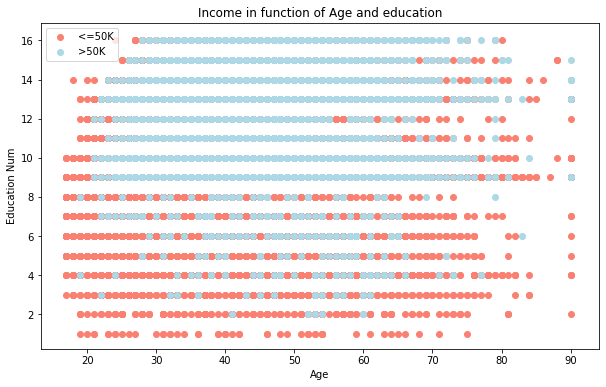

In [20]:
#Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(adult_data.Age[adult_data.income==1],
            adult_data.education_num[adult_data.income==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(adult_data.Age[adult_data.income==0],
            adult_data.education_num[adult_data.income==0],
            c="lightblue")

# Add some helpful info
plt.title("Income in function of Age and education")
plt.xlabel("Age")
plt.ylabel("Education Num")
plt.legend(["<=50K", ">50K"]);

In [21]:
# Make a crrelation matrix
adult_data.corr()

,Age,fnlwgt,education_num,capital gain,capital loss,hours-per-week,income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.234039
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,0.009481
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,-0.335182
capital gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,-0.223333
capital loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,-0.150523
hours-per-week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,-0.229690
income,-0.234039,0.009481,-0.335182,-0.223333,-0.150523,-0.229690,1.000000


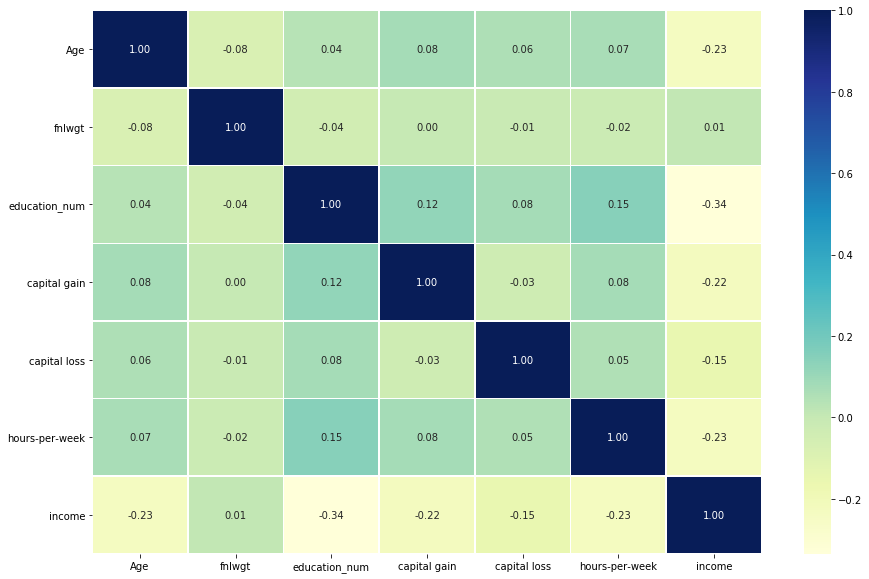

In [22]:
# Let's make our correlation matrix a little prettier
corr_matrix = adult_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
#ax.set_ylim(bottom + 0.5, top - 0.5)

# Modeling

In [23]:
#### Create a function to convert all objec columns to numbers so that the model works correctly


def preprocess_data(df):
    
    # This will turn all of the string value into category values
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    
    # turn categories into numbers
    for label, content in df.items():
       if not pd.api.types.is_numeric_dtype(content):
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [24]:
adult_data = preprocess_data(adult_data)
adult_data.head()

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country,income
0,50,7,83311,10,13,3,5,1,5,2,0,0,13,40,1
1,38,5,215646,12,9,1,7,2,5,2,0,0,40,40,1
2,53,5,234721,2,7,3,7,1,3,2,0,0,40,40,1
3,28,5,338409,10,13,3,11,6,3,1,0,0,40,6,1
4,37,5,284582,13,14,3,5,6,5,1,0,0,40,40,1


In [25]:
#save preprocessedd data

adult_data.to_csv("adult_data_preprocessed.csv",
                  index=False)

In [26]:
# Split data into X and y

X = adult_data.drop("income", axis=1)
y = adult_data["income"]

In [27]:
X

,Age,Workclass,fnlwgt,education,education_num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours-per-week,native country
0,50,7,83311,10,13,3,5,1,5,2,0,0,13,40
1,38,5,215646,12,9,1,7,2,5,2,0,0,40,40
2,53,5,234721,2,7,3,7,1,3,2,0,0,40,40
3,28,5,338409,10,13,3,11,6,3,1,0,0,40,6
4,37,5,284582,13,14,3,5,6,5,1,0,0,40,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,5,257302,8,12,3,14,6,5,1,0,0,38,40
32556,40,5,154374,12,9,3,8,1,5,2,0,0,40,40
32557,58,5,151910,12,9,7,2,5,5,1,0,0,40,40
32558,22,5,201490,12,9,5,2,4,5,2,0,0,20,40


In [28]:
y

0        1
1        1
2        1
3        1
4        1
        ..
32555    1
32556    0
32557    1
32558    1
32559    0
Name: income, Length: 32560, dtype: int64

In [29]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [30]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((26048, 14), (26048,), (6512, 14), (6512,))

time to build the machine learning model

We're going to try 3 different machine learning models:
 1. Logistic Regression
 2. CategoricalNB
 3. Linear SVC

In [31]:
# Import models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(max_iter=1000),
          "CategoricalNB": CategoricalNB(),
          "LinearSVC": LinearSVC(max_iter=1500),
          "KNN": KNeighborsClassifier()
         }


# Create a function to fit and score each model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    
    np.random.seed(42)
    
    model_scores = {}
    
    
    for name, model in models.items():
        
        model.fit(X_train, y_train)
        
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [32]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_val,
                             y_train=y_train,
                             y_test=y_val)

model_scores

/Users/jacobywilkerson/Documents/Python/income_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'Logistic Regression': 0.7882371007371007,
 'CategoricalNB': 0.8596437346437347,
 'LinearSVC': 0.8000614250614251,
 'KNN': 0.7741093366093366}

### Model Comparison

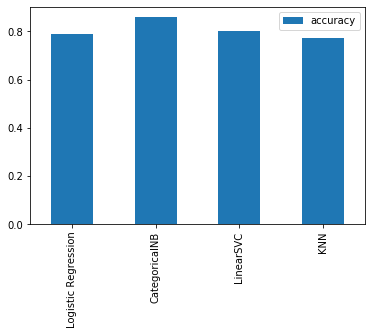

In [33]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

In [50]:
cat_model = CategoricalNB()

In [51]:
cat_model.fit(X_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
y_preds = cat_model.predict(X_val)

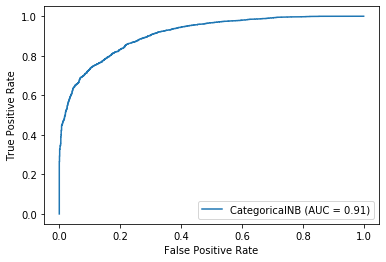

In [56]:
# Plot ROC curve and calculate AUC metric
from sklearn.metrics import plot_roc_curve

plot_roc_curve(cat_model, X_val, y_val)


In [59]:
# Show confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_preds))

[[1061  539]
 [ 375 4537]]


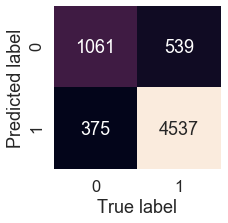

In [68]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_val, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_val, y_preds),
                     annot=True,
                     cbar=False,
                     fmt="d")
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    
    
plot_conf_mat(y_val, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1600
           1       0.89      0.92      0.91      4912

    accuracy                           0.86      6512
   macro avg       0.82      0.79      0.80      6512
weighted avg       0.86      0.86      0.86      6512

